# 신용거래 이상탐지 데이터 다루기
https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv

Step 1. 이것만큼은 꼭 해보세요!
- 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거
- 최소 2개 이상의 새로운 피처(변수)를 생성
    - 구매 금액, 시간 등의 변수를 이용  

Step 2. 이런것도 해볼 수 있어요!
- 데이터의 위도/경도 정보를 활용해볼 수 있을까?
- 통계적 관점으로 접근하여 유용한 변수를 만들어낼 수 있을까?

평가
1. 다수의 컬럼이름을 변경하고, 다양한 방법으로 결측치를 처리할 수 있는가?
    - 컬럼 이름의 변경이 명확하게 반영되어 있고, 다양한 방법으로 효과적인 결측치 처리를 진행할수 있는가?
2. 데이터 안의 이상치를 감지하고, 이를 적절하게 수정할 수 있는가?
    - 데이터의 이상치를 감지하여 수정하고 수정후 데이터의 일관성이 유지되며 품질 또한 향상 되었는가?
3. 주어진 변수에서 추가적인 변수를 생성해 낼 수 있는가?	
    - 추가적인 변수를 창의적으로 생성하고 유용하게 데이터 분석에 기여 하였는가?


실무팁(Code Function)  
모듈화와 패키징을 통해 반복적인 코드를 최적화하고, 실시간 시스템 운영을 자동화하는 데 초점을 맞춥니다.  
모듈과 패키지로 구조화된 코드는 재사용성과 관리 효율성을 높이며, 실시간 시스템의 안정성과 일관된 출력을 보장합니다.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터

### 데이터 확인

In [82]:
fraud = pd.read_csv('/Users/project/aiffel/fraud/fraud.csv')
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [83]:
fraud.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


### information

1. trans_date_trans_time: 거래의 날짜와 시간
2. cc_num: 신용 카드 번호
3. merchant: 거래를 처리한 가맹점(상인)의 정보
4. category: 상인이 거래하는 지역
5. amt: 거래 금액
6. first: 고객의 이름(첫 번째 이름)
7. last: 고객의 성(성)
7. gender: 고객의 성별
8. street: 고객의 거주지 주소
9. city: 고객의 거주 도시
10. state: 고객의 거주 주(state)
11. zip: 고객의 우편 번호
12. lat: 거래 위치의 위도
13. long: 거래 위치의 경도
14. city_pop: 거래 발생 도시의 인구
15. job: 고객의 직업
16. dob: 고객의 생년월일
17. trans_num: 거래 번호
18. unix_time: 1970년부터 현재까지 거래의 Unix 시간
19. merch_lat: 상인의 위치의 위도
20. merch_long: 상인의 위치의 경도
21. is_fraud: 거래가 사기인지 여부(1은 사기, 0은 비사기)

In [84]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

### 기술통계량

In [85]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [86]:
fraud.nunique()

trans_date_trans_time    488474
cc_num                      124
merchant                    693
category                     14
amt                       36446
first                        92
last                        102
gender                        2
street                      124
city                        121
state                        44
zip                         124
lat                         124
long                        124
city_pop                    122
job                         110
dob                         123
trans_num                491134
unix_time                488477
merch_lat                484503
merch_long               487445
is_fraud                      2
dtype: int64

### 결측치

info() 에서도 알 수 있듯이 결측치가 없는 데이터다.

In [87]:
fraud.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### 이상치

cc_num, amt, city_pop 에서 이상치가 보인다

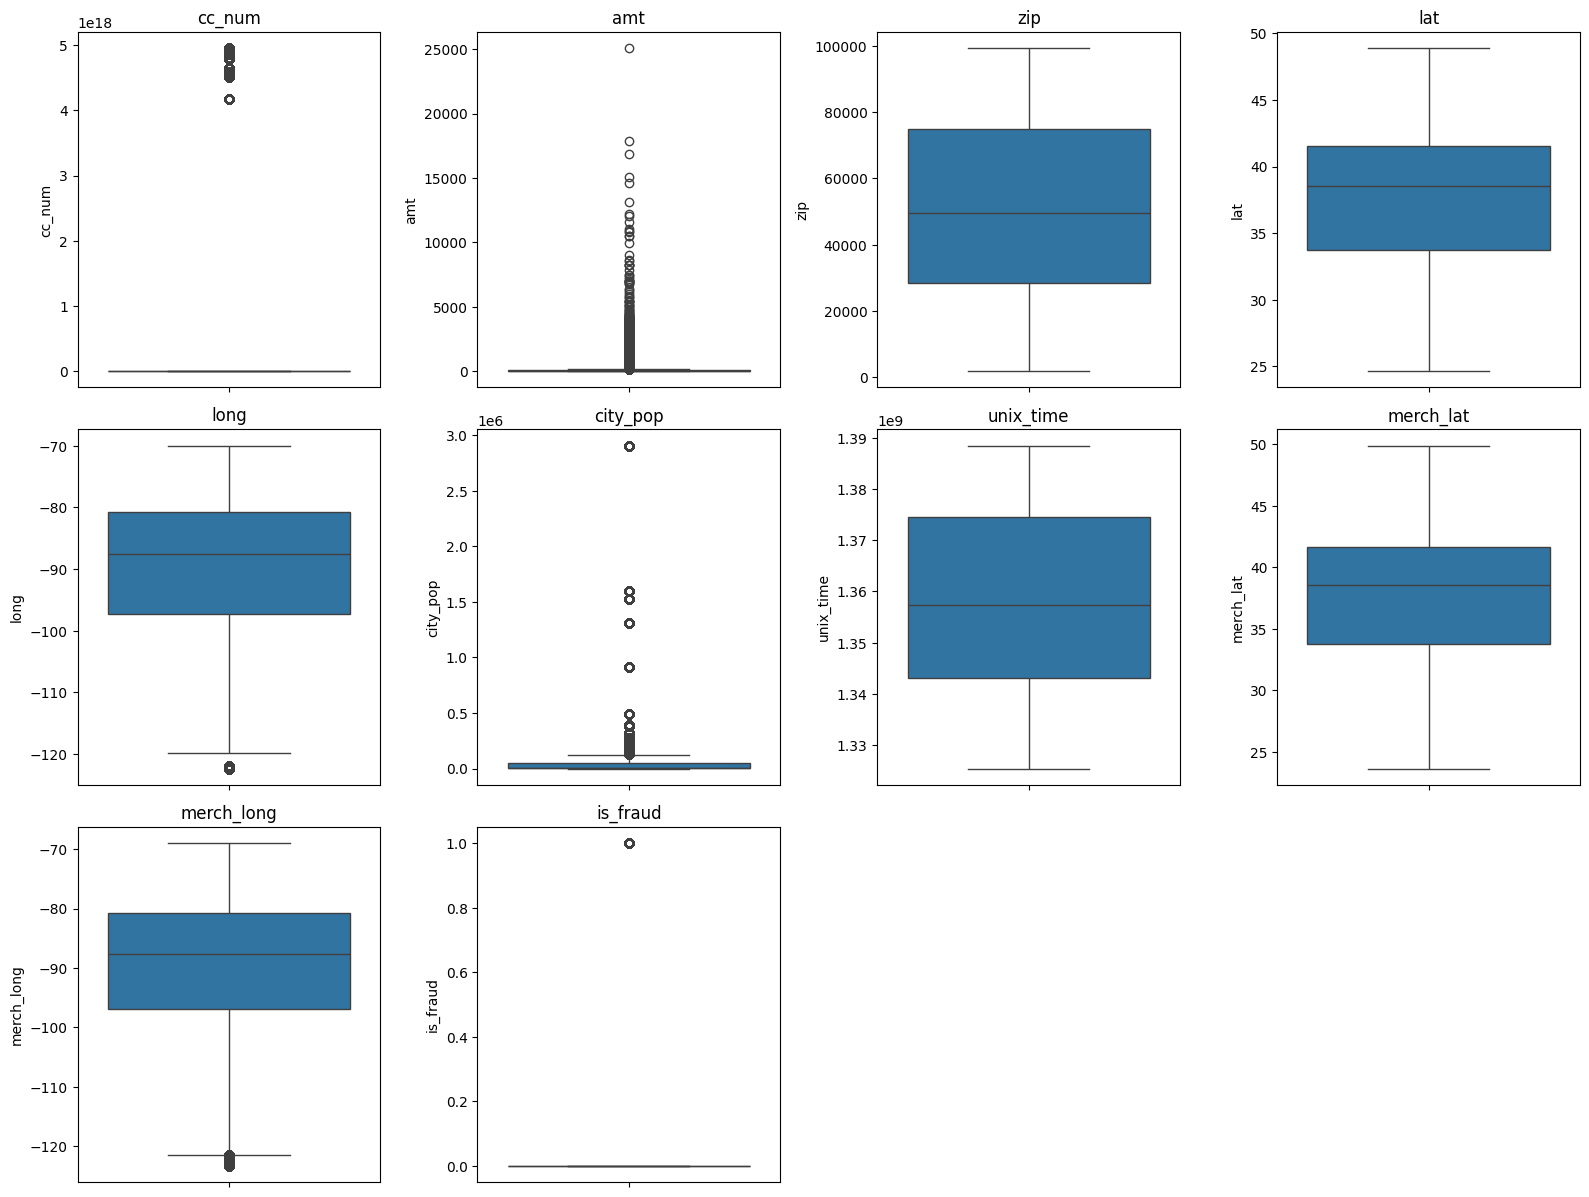

In [88]:
# 숫자 컬럼만 선택
numerical_cols = fraud.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(fraud[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

## 데이터 변환

In [89]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### trans_date_trans_time

#### datetime 으로 변환

In [90]:
fraud['trans_date_trans_time'] = pd.to_datetime(fraud['trans_date_trans_time'])

#### 년도, 시간 나누기

In [91]:
fraud['trans_date'] = fraud['trans_date_trans_time'].apply(lambda x: x.date())
fraud['trans_time'] = fraud['trans_date_trans_time'].apply(lambda x: x.time())
fraud

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,2019-01-01,00:12:34
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,2019-01-01,00:17:16
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,2019-01-01,00:20:15
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2019-01-01,00:23:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,2020-12-31,23:56:48
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,2020-12-31,23:56:57
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15


In [92]:
fraud = fraud[['trans_date', 'trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud']]
fraud

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31,23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31,23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


### dob
고객의 생년월일

생년월일로 나이 구해서 dob를 age 칼럼으로 변경

#### trans_date 에서 년도 유니크 뽑기

In [93]:
fraud['trans_date'] = pd.to_datetime(fraud['trans_date'])
fraud['trans_date'].dt.year.unique()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/1229150800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['trans_date'] = pd.to_datetime(fraud['trans_date'])


array([2019, 2020], dtype=int32)

#### dob 자르기
2020년 기준으로 나이 구하기

In [94]:
date = 2020
date_list = fraud['dob'].str.split('-')
date_list

0         [1978, 06, 21]
1         [1980, 12, 21]
2         [1974, 07, 19]
3         [1971, 11, 05]
4         [1977, 02, 22]
               ...      
491129    [1983, 02, 08]
491130    [1984, 06, 03]
491131    [1999, 12, 27]
491132    [1981, 11, 29]
491133    [1993, 05, 10]
Name: dob, Length: 491134, dtype: object

#### 년도만 구해서 int로 변환

In [95]:
date_list = date_list.str.get(0).astype('int')
date_list

0         1978
1         1980
2         1974
3         1971
4         1977
          ... 
491129    1983
491130    1984
491131    1999
491132    1981
491133    1993
Name: dob, Length: 491134, dtype: int64

#### 나이 계산

In [96]:
date_list = date - date_list
date_list

0         42
1         40
2         46
3         49
4         43
          ..
491129    37
491130    36
491131    21
491132    39
491133    27
Name: dob, Length: 491134, dtype: int64

#### dob 을 age 로 변환

In [97]:
fraud.rename(columns={'dob':'age'}, inplace=True)
fraud['age'] = date_list
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/2839641392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud.rename(columns={'dob':'age'}, inplace=True)
/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/2839641392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['age'] = date_list


,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,42,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,40,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,...,40.6152,-74.4150,71485,Leisure centre manager,46,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,49,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909,"Designer, furniture",43,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


### unix_time

읽을 수 있게 변환

datetime.utcfromtimestamp 메소드는 단일 타임스탬프를 인자로 받아서 해당 타임스탬프를 UTC (협정 세계시)에서의 날짜와 시간으로 변환  
'unix_time' 값에 대해 이 메소드를 적용하려면 Pandas의 apply 함수를 사용하여 각 행에 대해 함수를 적용

In [98]:
from datetime import datetime

In [99]:
fraud['unix_time'].dtype

dtype('int64')

In [100]:
fraud['unix_time'].apply(lambda x: datetime.utcfromtimestamp(x))

0        2012-01-01 00:00:44
1        2012-01-01 00:12:34
2        2012-01-01 00:17:16
3        2012-01-01 00:20:15
4        2012-01-01 00:23:41
                 ...        
491129   2013-12-31 23:56:48
491130   2013-12-31 23:56:57
491131   2013-12-31 23:59:09
491132   2013-12-31 23:59:15
491133   2013-12-31 23:59:34
Name: unix_time, Length: 491134, dtype: datetime64[ns]

### trans_num
거래 ID

원래 고유한 값은 보안 및 식별성 문제로 인해 일반적으로 짧게 변경하거나 암호화 하지 않는다.  
하지만, 이 데이터는 식별성이 그렇게 중요하다 판단하지 않기 때문에 짧게 줄일 것이다.  
모델을 만다는 게 목적이라면 고유한 식별자 열은 모델에게 유용한 정보를 제공하지 않기 때문에 일반적으로 제거되거나 무시된다.

이런 라이브러리가 있다는 걸 연습하고 뒤에서 drop 할 예정이다.

해시(hash)함수: 임의의 길이를 가진 데이터를 입력받아 고정된 길이의 값, 즉 해시값을 출력하는 함수



In [101]:
import hashlib

def shorten_trans_num(trans_num):
    if isinstance(trans_num, str):           # 문자열인 경우에만 인코딩
        trans_num = trans_num.encode()
    hash_object = hashlib.sha256(trans_num)  # SHA-256 해시 생성
    # 16진수로 변환하고 앞에서 일부만 추출 (예: 10자리)
    shortened_hash = hash_object.hexdigest()[:10]
    return shortened_hash

In [102]:
fraud['trans_num'] =  fraud['trans_num'].apply(shorten_trans_num)
fraud

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/2629992115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['trans_num'] =  fraud['trans_num'].apply(shorten_trans_num)


,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,42,00861bc278,1325376044,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,40,43569429a2,1325376754,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,...,40.6152,-74.4150,71485,Leisure centre manager,46,e65db629ed,1325377036,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,...,42.2203,-83.3583,31515,Police officer,49,57862b44e0,1325377215,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909,"Designer, furniture",43,37bc61a724,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31,23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,...,34.2651,-77.8670,186140,English as a second language teacher,37,72890abd9d,1388534208,34.853497,-78.664158,0
491130,2020-12-31,23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,...,34.0326,-82.2027,1523,Research scientist (physical sciences),36,bf3ab3e4af,1388534217,35.008839,-81.475156,0
491131,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,21,7d171dff4a,1388534349,29.661049,-96.186633,0
491132,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,39,2aa50e4edb,1388534355,46.658340,-119.715054,0


### 불필요한 칼럼 제거

#### first, last 칼럼 삭제

In [103]:
fraud.drop(columns=['first', 'last'], inplace=True)
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/3815710251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud.drop(columns=['first', 'last'], inplace=True)


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,42,00861bc278,1325376044,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,...,40.6747,-74.2239,124967,Operational researcher,40,43569429a2,1325376754,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,...,40.6152,-74.4150,71485,Leisure centre manager,46,e65db629ed,1325377036,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,...,42.2203,-83.3583,31515,Police officer,49,57862b44e0,1325377215,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,...,30.4066,-91.1468,378909,"Designer, furniture",43,37bc61a724,1325377421,29.737426,-90.853194,0


#### unixt_time 칼럼 삭제
datetime으로 변환해본 결과 카드 생성날짜? 인 거 같아서 필요없을 거 같아서 삭제

In [104]:
fraud.drop(columns='unix_time', inplace=True)
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/3748958234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud.drop(columns='unix_time', inplace=True)


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,age,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,42,00861bc278,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,40,43569429a2,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,46,e65db629ed,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,49,57862b44e0,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",43,37bc61a724,29.737426,-90.853194,0


#### trans_nume 칼럼 삭제

In [105]:
fraud.drop(columns='trans_num', inplace=True)
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/707961336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud.drop(columns='trans_num', inplace=True)


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,age,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,42,49.159047,-118.186462,0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,40,40.079588,-74.848087,0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,46,40.021888,-74.228188,0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,49,42.360426,-83.552316,0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",43,29.737426,-90.853194,0


## 시각화

### 카테고리별 거래 금액

In [106]:
category_amt_sum = fraud.groupby('category')['amt'].sum()
category_amt_sum

category
entertainment     2458569.93
food_dining       1508778.45
gas_transport     2903118.47
grocery_net       1259079.01
grocery_pos       5415410.50
health_fitness    1712777.02
home              2408821.40
kids_pets         2217809.08
misc_net          2067748.82
misc_pos          2345398.08
personal_care     1617845.09
shopping_net      3190267.93
shopping_pos      4007883.87
travel             799354.17
Name: amt, dtype: float64

<Axes: xlabel='category'>

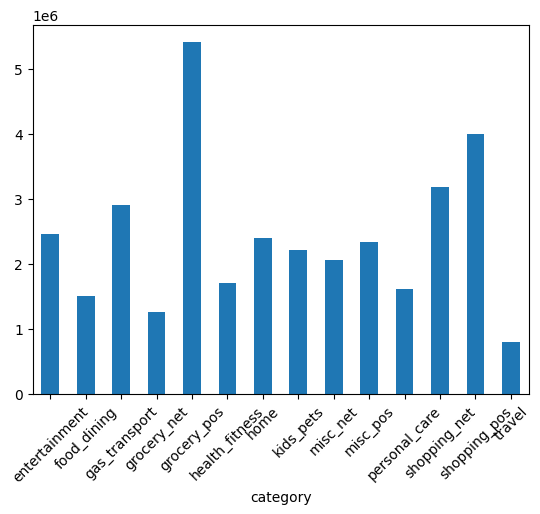

In [107]:
category_amt_sum.plot(kind='bar', rot=45)

### 성별에 따른 사기 여부

<Axes: xlabel='gender', ylabel='count'>

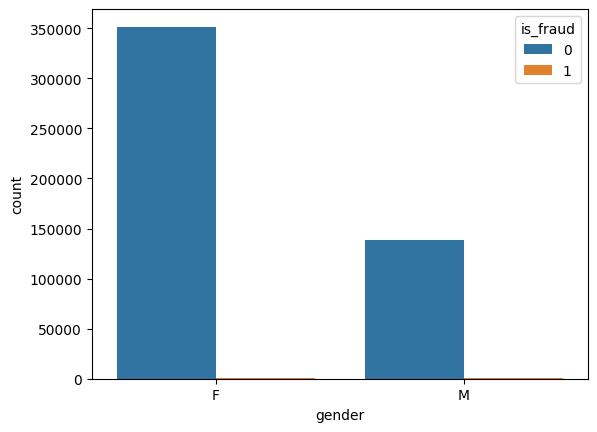

In [108]:
sns.countplot(x='gender', hue='is_fraud', data=fraud)

### 연령대에 따른 거래 금액

In [109]:
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

fraud['age_group'] = pd.cut(fraud['age'], bins=age_bins, labels=age_labels, right=False)
age_group_amt_sum = fraud.groupby('age_group')['amt'].sum()
age_group_amt_sum

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/3650153992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['age_group'] = pd.cut(fraud['age'], bins=age_bins, labels=age_labels, right=False)


age_group
18-29      7752665.45
30-39     11677638.67
40-49     12744811.08
50-59       961743.47
60-69            0.00
70-79            0.00
80-89            0.00
90-100           0.00
Name: amt, dtype: float64

<Axes: xlabel='age_group'>

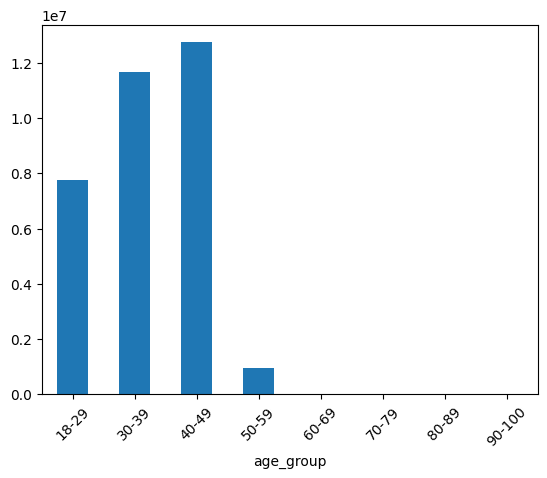

In [110]:
age_group_amt_sum.plot(kind='bar', rot=45)

### 연령대에 따른 사기 여부

In [111]:
age_fraud_df = fraud[['age_group', 'is_fraud']]
age_fraud_ratio = age_fraud_df.groupby('age_group')['is_fraud'].mean() * 100
age_fraud_ratio

age_group
18-29     0.299238
30-39     0.234213
40-49     0.241945
50-59     0.201060
60-69          NaN
70-79          NaN
80-89          NaN
90-100         NaN
Name: is_fraud, dtype: float64

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/2289251892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_fraud_ratio.index, y=age_fraud_ratio.values, palette='pastel')


<Axes: xlabel='age_group'>

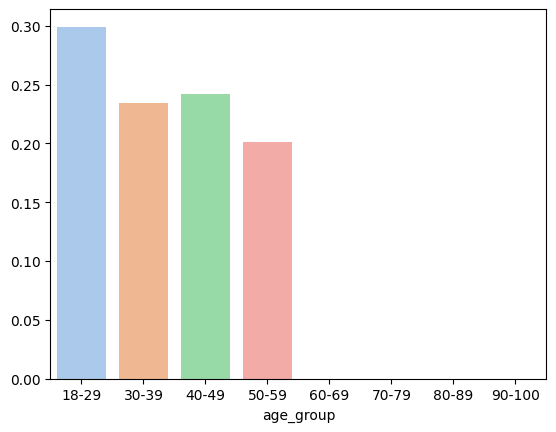

In [112]:
sns.barplot(x=age_fraud_ratio.index, y=age_fraud_ratio.values, palette='pastel')

### 지역별 평균 거래 금액

In [113]:
state_avg_amt = fraud.groupby('state')['amt'].mean()
state_avg_amt

state
AL    65.699668
AR    85.486477
AZ    86.110176
CA    78.933971
CO    89.374827
CT    58.345860
FL    73.122113
GA    50.526703
IA    59.443771
ID    88.547267
IL    65.553478
IN    74.399041
KS    65.962009
KY    61.194163
LA    78.728839
MA    70.121438
MD    59.665280
ME    51.020702
MI    69.556822
MN    63.083155
MO    57.363666
MS    70.157061
MT    52.537867
NC    76.598995
ND    53.941673
NE    56.471236
NJ    74.831759
NM    58.863322
NV    47.876443
NY    72.731235
OH    73.654805
OK    61.737724
PA    68.194167
SC    59.665852
SD    61.308082
TN    72.730233
TX    70.394278
UT    59.124403
VA    59.366355
VT    68.813245
WA    71.200729
WI    57.301258
WV    72.477570
WY    93.142125
Name: amt, dtype: float64

<Axes: ylabel='state'>

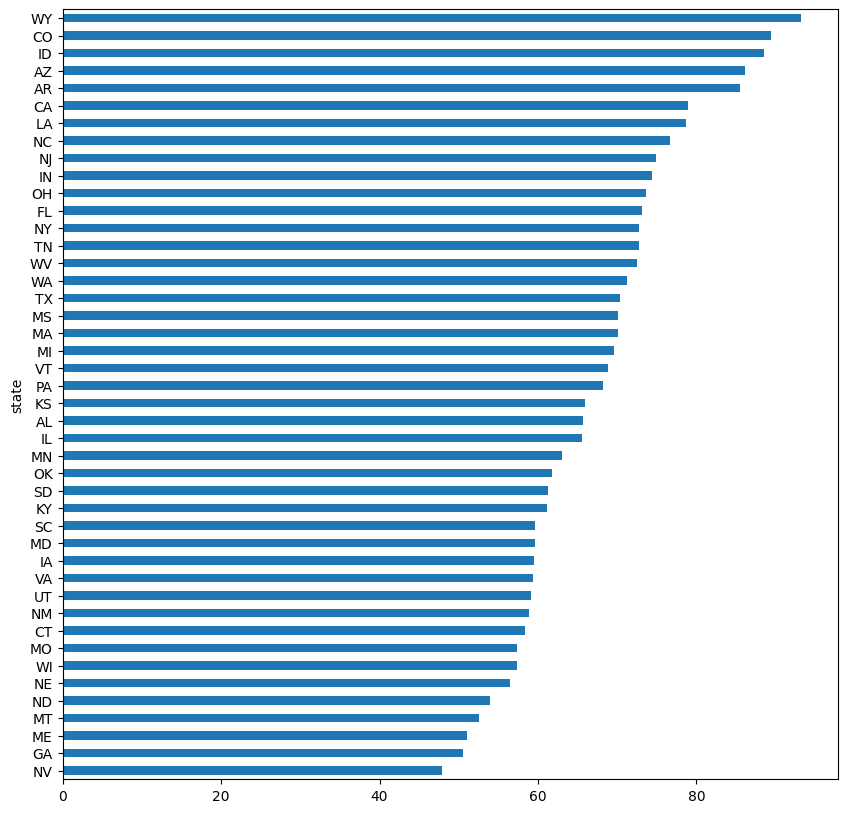

In [114]:
plt.figure(figsize=(10, 10))
state_avg_amt.sort_values().plot(kind='barh')

### 직업별 사기 거래 비율

In [115]:
job_fraud_ratio = fraud.groupby('job')['is_fraud'].mean() * 100
job_fraud_ratio

job
Advertising account planner    0.246711
Building surveyor              0.300958
Camera operator                0.320000
Careers information officer    0.182857
Ceramics designer              0.137112
                                 ...   
Toxicologist                   0.164926
Trade mark attorney            0.091387
Travel agency manager          0.218818
Tree surgeon                   0.296533
Water engineer                 0.148741
Name: is_fraud, Length: 110, dtype: float64

In [116]:
# 상위 10개 직업 선택
top_10_jobs = job_fraud_ratio.sort_values(ascending=False).head(10)
top_10_jobs

job
Hospital doctor                          0.437876
Development worker, international aid    0.437158
Futures trader                           0.437039
Secondary school teacher                 0.436681
Clothing/textile technologist            0.411410
Race relations officer                   0.411410
Social researcher                        0.410509
Sub                                      0.410060
Energy manager                           0.409836
Lecturer, further education              0.409724
Name: is_fraud, dtype: float64

<Axes: ylabel='job'>

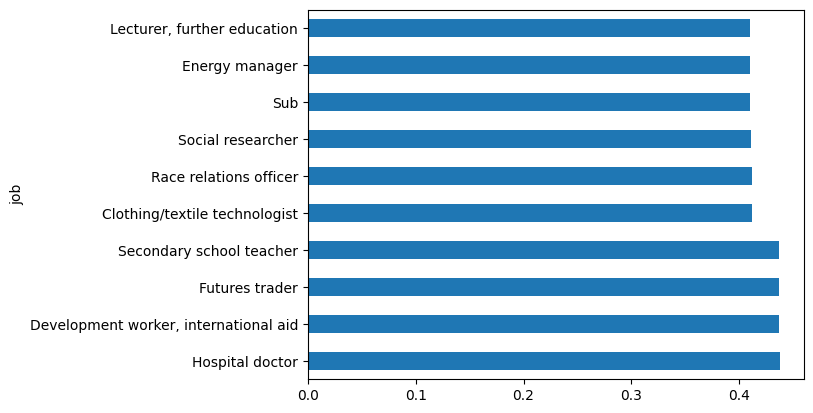

In [117]:
top_10_jobs.plot(kind='barh')

## feature engineering

### 거래 금액 로그 변환

In [118]:
fraud['log_amt'] = np.log1p(fraud['amt'])
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/753017279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['log_amt'] = np.log1p(fraud['amt'])


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,age,merch_lat,merch_long,is_fraud,age_group,log_amt
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,42,49.159047,-118.186462,0,40-49,4.684259
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,...,40.6747,-74.2239,124967,Operational researcher,40,40.079588,-74.848087,0,40-49,3.822317
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,...,40.6152,-74.4150,71485,Leisure centre manager,46,40.021888,-74.228188,0,40-49,3.856087
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,...,42.2203,-83.3583,31515,Police officer,49,42.360426,-83.552316,0,40-49,4.175771
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,...,30.4066,-91.1468,378909,"Designer, furniture",43,29.737426,-90.853194,0,40-49,3.280159


<Axes: xlabel='log_amt', ylabel='Count'>

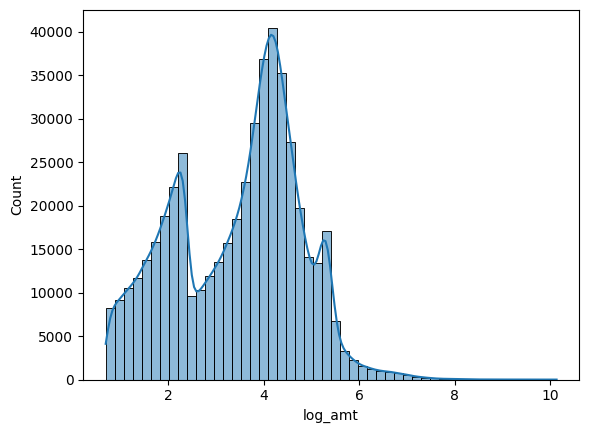

In [119]:
sns.histplot(fraud['log_amt'], bins=50, kde=True)

### 거리 기반 피처 생성
great_circle 함수: 지리적인 위치 정보를 사용하여 두 지점 간의 거리를 계산하는 데 사용
- 헤버사인 거리를 기반으로 하여 구 형태의 지구에서 두 지점 간의 최단 거리를 계산
- 지구의 곡률을 고려하여 두 지점 간의 최단 거리를 측정하므로, 단순한 직선 거리(피타고라스의 정리를 사용하는 경우)보다 정확한 결과를 제공

In [121]:
from geopy.distance import great_circle

# 거래 위치와 상점 위치 간의 거리 계산
fraud['distance'] = fraud.apply(lambda x: great_circle((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).kilometers, axis=1)
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/845698591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['distance'] = fraud.apply(lambda x: great_circle((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).kilometers, axis=1)


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,long,city_pop,job,age,merch_lat,merch_long,is_fraud,age_group,log_amt,distance
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,-118.2105,149,Special educational needs teacher,42,49.159047,-118.186462,0,40-49,4.684259,30.212218
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,...,-74.2239,124967,Operational researcher,40,40.079588,-74.848087,0,40-49,3.822317,84.702240
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,...,-74.4150,71485,Leisure centre manager,46,40.021888,-74.228188,0,40-49,3.856087,67.847838
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,...,-83.3583,31515,Police officer,49,42.360426,-83.552316,0,40-49,4.175771,22.303938
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,...,-91.1468,378909,"Designer, furniture",43,29.737426,-90.853194,0,40-49,3.280159,79.592055


<Axes: xlabel='distance', ylabel='Count'>

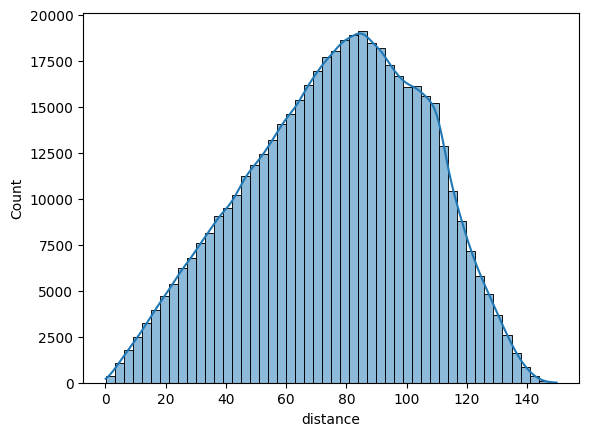

In [122]:
sns.histplot(fraud['distance'], bins=50, kde=True)

### 거래 금액의 이전 거래 대비 증감율

In [130]:
fraud['amt_increase_rate'] = fraud.groupby('cc_num')['amt'].pct_change().fillna(0)
fraud.head()

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_10374/2599080989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['amt_increase_rate'] = fraud.groupby('cc_num')['amt'].pct_change().fillna(0)


,trans_date,trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,city_pop,job,age,merch_lat,merch_long,is_fraud,age_group,log_amt,distance,amt_increase_rate
0,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,149,Special educational needs teacher,42,49.159047,-118.186462,0,40-49,4.684259,30.212218,0.0
1,2019-01-01,00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,269 Sanchez Rapids,Elizabeth,NJ,...,124967,Operational researcher,40,40.079588,-74.848087,0,40-49,3.822317,84.702240,0.0
2,2019-01-01,00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,2481 Mills Lock,Plainfield,NJ,...,71485,Leisure centre manager,46,40.021888,-74.228188,0,40-49,3.856087,67.847838,0.0
3,2019-01-01,00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,61390 Hayes Port,Romulus,MI,...,31515,Police officer,49,42.360426,-83.552316,0,40-49,4.175771,22.303938,0.0
4,2019-01-01,00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,50872 Alex Plain Suite 088,Baton Rouge,LA,...,378909,"Designer, furniture",43,29.737426,-90.853194,0,40-49,3.280159,79.592055,0.0


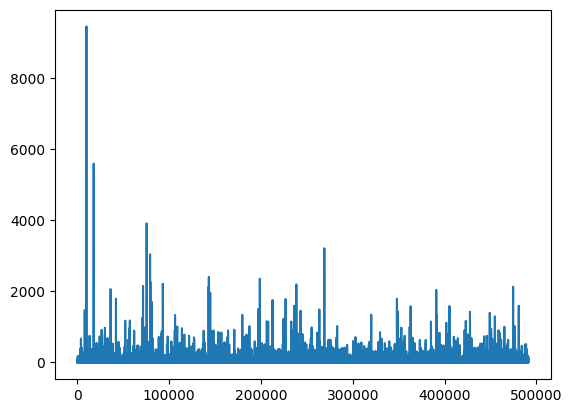

In [131]:
plt.plot(fraud['amt_increase_rate'])

# 회고

오늘은 여태 배운 거 복습하면서 피처 엔지니어링, 실무팁에 대해 배웠다.  
피처 엔지니어링을 프로젝트를 하면서 한 번도 사용한 적이 없었다.  
아직까지도 이해가 잘되지 않지만 알게된 이후로 조금 더 데이터를 확인해 보면서, 이런 식으로 처리해볼까 다양한 시도를 해볼 수 있게 된 거 같다.  

실무팁인 code function도 너무 좋은 정보인 거 같다.  
이걸 함수로 만든다면, 클래스로 만든다면 좋을 거 같다고 생각만 하고 제대로 활용적이 없었는데  
오늘을 계기로 자주 쓰는 코드들을 모듈화, 패키징 하려고 습관을 들어야겠다.  

프로젝트 -완-